## Solar Power Prediction using Linear Regression Algorithm

In [ ]:
# To install the necessary Python libraries for script
!pip install pandas numpy seaborn scikit-learn matplotlib

In [126]:
# Import necessary libraries
import pandas as pd  
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [127]:
# Load the dataset
data = pd.read_csv('dataset\solarpowergeneration.csv')
data

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.100950
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.999400
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.849300
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.609200
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.203400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,8.69,66,1025.1,0.0,0.0,100.0,100,100,100,257.21,...,285.42,25.50,283.06,24.01,282.99,25.20,22.700907,64.952098,167.06794,173.410560
4209,7.57,90,1026.1,0.0,0.0,100.0,79,100,100,210.04,...,6.91,13.00,4.76,11.61,7.13,10.44,19.307487,63.895118,182.28247,403.792220
4210,7.27,90,1026.3,0.1,0.0,100.0,73,100,100,113.92,...,2.29,8.71,352.87,7.95,354.81,22.32,25.249506,65.827032,197.33868,158.367780
4211,8.25,81,1025.5,0.0,0.0,100.0,74,66,100,186.90,...,11.31,6.29,13.24,5.94,14.04,15.48,36.361161,70.496313,211.30027,126.953060


In [128]:
# Basic Data Cleaning
# Check and handle outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Example for generated power
data_cleaned = remove_outliers(data, 'generated_power_kw')
print(f"Original shape: {data.shape}, After removing outliers: {data_cleaned.shape}")

Original shape: (4213, 21), After removing outliers: (4213, 21)


In [129]:
# First 10 rows
data.head(10)

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.100950
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.999400
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.849300
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.609200
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.203400
5,8.69,29,1034.6,0.0,0.0,0.0,0,0,0,449.45,...,23.63,7.10,30.47,6.92,27.90,17.28,25.088167,65.700860,197.22062,2546.081600
6,9.72,27,1034.0,0.0,0.0,0.0,0,0,0,469.92,...,25.02,6.61,29.36,6.44,26.57,12.96,36.197514,70.351498,211.21422,2270.320700
7,10.07,28,1034.1,0.0,0.0,0.0,0,0,0,436.99,...,14.74,7.63,19.29,7.52,16.70,10.80,49.073008,77.228779,223.65641,1063.830200
8,9.38,32,1033.9,0.0,0.0,0.0,0,0,0,353.33,...,6.58,10.50,5.91,10.14,6.12,11.52,62.371140,85.585411,234.50308,86.817611
9,6.54,47,1035.1,0.0,0.0,0.0,0,0,0,228.73,...,360.00,12.25,1.68,11.53,1.79,12.24,105.866560,121.463180,216.06756,9.666667


In [130]:
# Last 10 rows
data.tail(10)

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
4203,11.54,54,1023.9,0.0,0.0,6.6,22,0,0,339.09,...,179.06,25.20,180.00,22.33,178.15,31.32,49.353298,77.504836,223.76691,88.522500
4204,3.13,94,1025.9,0.0,0.0,44.0,33,44,0,0.00,...,216.16,17.08,235.30,15.38,212.57,29.52,72.200776,92.520489,118.46938,14.523889
4205,0.73,99,1027.3,0.0,0.0,36.0,13,36,0,2.67,...,244.13,19.20,263.54,14.08,237.53,21.96,58.634855,83.222229,128.50129,129.439170
4206,5.01,78,1027.4,0.0,0.0,100.0,22,35,100,110.36,...,260.13,14.78,267.21,7.52,253.30,12.24,45.308666,75.151027,139.82631,389.736670
4207,7.51,72,1026.0,0.0,0.0,100.0,100,67,100,137.06,...,298.30,12.88,296.57,11.27,296.57,11.88,32.781365,68.857259,152.71076,523.156940
4208,8.69,66,1025.1,0.0,0.0,100.0,100,100,100,257.21,...,285.42,25.50,283.06,24.01,282.99,25.20,22.700907,64.952098,167.06794,173.410560
4209,7.57,90,1026.1,0.0,0.0,100.0,79,100,100,210.04,...,6.91,13.00,4.76,11.61,7.13,10.44,19.307487,63.895118,182.28247,403.792220
4210,7.27,90,1026.3,0.1,0.0,100.0,73,100,100,113.92,...,2.29,8.71,352.87,7.95,354.81,22.32,25.249506,65.827032,197.33868,158.367780
4211,8.25,81,1025.5,0.0,0.0,100.0,74,66,100,186.90,...,11.31,6.29,13.24,5.94,14.04,15.48,36.361161,70.496313,211.30027,126.953060
4212,8.00,80,1025.3,0.0,0.0,100.0,100,100,100,172.66,...,12.72,12.07,17.35,11.38,18.43,16.20,48.452849,76.919574,223.04931,20.055031


In [131]:
#Data Sample
print("\nRandom Sample of 5 Records:")
print(data.sample(5))


Random Sample of 5 Records:
      temperature_2_m_above_gnd  relative_humidity_2_m_above_gnd  \
2132                      16.43                               58   
3837                       3.76                               63   
2599                      32.44                               11   
3466                      10.89                               94   
3511                       8.38                               70   

      mean_sea_level_pressure_MSL  total_precipitation_sfc  \
2132                       1015.4                      0.0   
3837                       1017.6                      0.0   
2599                       1011.6                      0.0   
3466                       1012.7                      0.0   
3511                       1022.4                      0.0   

      snowfall_amount_sfc  total_cloud_cover_sfc  \
2132                  0.0                    0.0   
3837                  0.0                  100.0   
2599                  0.0        

In [132]:
# Dimensions of the dataset
data.shape

(4213, 21)

In [133]:
# Statistical summary
data.describe()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
count,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,...,4213.000000,4213.000000,4213.000000,4213.00000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000
mean,15.068111,51.361025,1019.337812,0.031759,0.002808,34.056990,14.458818,20.023499,21.373368,387.759036,...,195.078452,18.978483,191.166862,16.36319,192.447911,20.583489,50.837490,59.980947,169.167651,1134.347313
std,8.853677,23.525864,7.022867,0.170212,0.038015,42.843638,30.711707,36.387948,38.013885,278.459293,...,106.626782,11.999960,108.760021,9.88533,106.516195,12.648899,26.638965,19.857711,64.568385,937.957247
min,-5.350000,7.000000,997.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.540000,0.000000,1.120000,0.00000,1.120000,0.720000,3.755323,17.727761,54.379093,0.000595
25%,8.390000,32.000000,1014.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,142.400000,...,153.190000,10.140000,130.240000,9.18000,148.220000,11.160000,29.408181,45.291631,114.136600,231.700450
50%,14.750000,48.000000,1018.100000,0.000000,0.000000,8.700000,0.000000,0.000000,0.000000,381.810000,...,191.770000,16.240000,187.770000,14.49000,187.990000,18.000000,47.335557,62.142611,163.241650,971.642650
75%,21.290000,70.000000,1023.600000,0.000000,0.000000,100.000000,9.000000,10.000000,10.000000,599.860000,...,292.070000,26.140000,292.040000,21.97000,288.000000,27.000000,69.197492,74.346737,225.085620,2020.966700
max,34.900000,100.000000,1046.800000,3.200000,1.680000,100.000000,100.000000,100.000000,100.000000,952.300000,...,360.000000,66.880000,360.000000,61.11000,360.000000,84.960000,121.635920,128.415370,289.045180,3056.794100


In [134]:
# Check information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4213 entries, 0 to 4212
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   temperature_2_m_above_gnd          4213 non-null   float64
 1   relative_humidity_2_m_above_gnd    4213 non-null   int64  
 2   mean_sea_level_pressure_MSL        4213 non-null   float64
 3   total_precipitation_sfc            4213 non-null   float64
 4   snowfall_amount_sfc                4213 non-null   float64
 5   total_cloud_cover_sfc              4213 non-null   float64
 6   high_cloud_cover_high_cld_lay      4213 non-null   int64  
 7   medium_cloud_cover_mid_cld_lay     4213 non-null   int64  
 8   low_cloud_cover_low_cld_lay        4213 non-null   int64  
 9   shortwave_radiation_backwards_sfc  4213 non-null   float64
 10  wind_speed_10_m_above_gnd          4213 non-null   float64
 11  wind_direction_10_m_above_gnd      4213 non-null   float

In [135]:
# Check for the missing values
data.isnull().sum()

temperature_2_m_above_gnd            0
relative_humidity_2_m_above_gnd      0
mean_sea_level_pressure_MSL          0
total_precipitation_sfc              0
snowfall_amount_sfc                  0
total_cloud_cover_sfc                0
high_cloud_cover_high_cld_lay        0
medium_cloud_cover_mid_cld_lay       0
low_cloud_cover_low_cld_lay          0
shortwave_radiation_backwards_sfc    0
wind_speed_10_m_above_gnd            0
wind_direction_10_m_above_gnd        0
wind_speed_80_m_above_gnd            0
wind_direction_80_m_above_gnd        0
wind_speed_900_mb                    0
wind_direction_900_mb                0
wind_gust_10_m_above_gnd             0
angle_of_incidence                   0
zenith                               0
azimuth                              0
generated_power_kw                   0
dtype: int64

In [136]:
# Check for duplicate data
data.duplicated().sum()

np.int64(0)

In [137]:
#Unique Values Count
for column in data.columns:
    print(f"\nUnique values in {column}: {data[column].nunique()}")
    print(f"Sample values: {data[column].unique()[:5]}")


Unique values in temperature_2_m_above_gnd: 2413
Sample values: [2.17 2.31 3.65 5.82 7.73]

Unique values in relative_humidity_2_m_above_gnd: 94
Sample values: [31 27 33 30 29]

Unique values in mean_sea_level_pressure_MSL: 376
Sample values: [1035.  1035.1 1035.4 1034.4 1034.6]

Unique values in total_precipitation_sfc: 23
Sample values: [0.  0.1 0.2 0.3 0.4]

Unique values in snowfall_amount_sfc: 11
Sample values: [0.   0.07 0.28 0.42 0.14]

Unique values in total_cloud_cover_sfc: 160
Sample values: [  0.    0.9   1.8 100.   38. ]

Unique values in high_cloud_cover_high_cld_lay: 97
Sample values: [  0   3   6 100  17]

Unique values in medium_cloud_cover_mid_cld_lay: 98
Sample values: [  0 100  38  62  49]

Unique values in low_cloud_cover_low_cld_lay: 99
Sample values: [  0   2  10   3 100]

Unique values in shortwave_radiation_backwards_sfc: 1015
Sample values: [  0.     1.78 108.58 258.1  375.58]

Unique values in wind_speed_10_m_above_gnd: 1505
Sample values: [6.37 5.15 4.68 3.6

In [138]:
#Detailed Statistical Summary
print("\nDetailed Statistics:")
print(data.describe(include='all').T)  # Transposed for better readability
print("\nSkewness:")
print(data.skew())



Detailed Statistics:
                                    count         mean         std  \
temperature_2_m_above_gnd          4213.0    15.068111    8.853677   
relative_humidity_2_m_above_gnd    4213.0    51.361025   23.525864   
mean_sea_level_pressure_MSL        4213.0  1019.337812    7.022867   
total_precipitation_sfc            4213.0     0.031759    0.170212   
snowfall_amount_sfc                4213.0     0.002808    0.038015   
total_cloud_cover_sfc              4213.0    34.056990   42.843638   
high_cloud_cover_high_cld_lay      4213.0    14.458818   30.711707   
medium_cloud_cover_mid_cld_lay     4213.0    20.023499   36.387948   
low_cloud_cover_low_cld_lay        4213.0    21.373368   38.013885   
shortwave_radiation_backwards_sfc  4213.0   387.759036  278.459293   
wind_speed_10_m_above_gnd          4213.0    16.228787    9.876948   
wind_direction_10_m_above_gnd      4213.0   195.078452  106.626782   
wind_speed_80_m_above_gnd          4213.0    18.978483   11.999960  

In [139]:
#Value Ranges
print("\nValue Ranges for Each Column:")
for column in data.columns:
    print(f"\n{column}:")
    print(f"Min: {data[column].min()}")
    print(f"Max: {data[column].max()}")
    print(f"Range: {data[column].max() - data[column].min()}")



Value Ranges for Each Column:

temperature_2_m_above_gnd:
Min: -5.35
Max: 34.9
Range: 40.25

relative_humidity_2_m_above_gnd:
Min: 7
Max: 100
Range: 93

mean_sea_level_pressure_MSL:
Min: 997.5
Max: 1046.8
Range: 49.299999999999955

total_precipitation_sfc:
Min: 0.0
Max: 3.2
Range: 3.2

snowfall_amount_sfc:
Min: 0.0
Max: 1.68
Range: 1.68

total_cloud_cover_sfc:
Min: 0.0
Max: 100.0
Range: 100.0

high_cloud_cover_high_cld_lay:
Min: 0
Max: 100
Range: 100

medium_cloud_cover_mid_cld_lay:
Min: 0
Max: 100
Range: 100

low_cloud_cover_low_cld_lay:
Min: 0
Max: 100
Range: 100

shortwave_radiation_backwards_sfc:
Min: 0.0
Max: 952.3
Range: 952.3

wind_speed_10_m_above_gnd:
Min: 0.0
Max: 61.18
Range: 61.18

wind_direction_10_m_above_gnd:
Min: 0.54
Max: 360.0
Range: 359.46

wind_speed_80_m_above_gnd:
Min: 0.0
Max: 66.88
Range: 66.88

wind_direction_80_m_above_gnd:
Min: 1.12
Max: 360.0
Range: 358.88

wind_speed_900_mb:
Min: 0.0
Max: 61.11
Range: 61.11

wind_direction_900_mb:
Min: 1.12
Max: 360.0
Rang

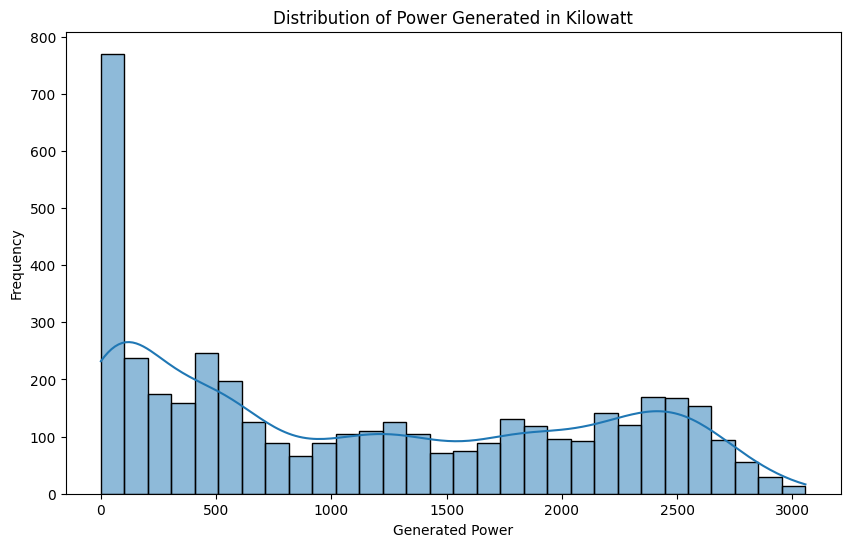

In [140]:
# Plot distribution of 'generated_power_kw' 
plt.figure(figsize=(10, 6))
plt.title('Distribution of Power Generated in Kilowatt')
sns.histplot(data['generated_power_kw'], bins=30, kde=True)
plt.xlabel('Generated Power')
plt.ylabel('Frequency')
plt.show()

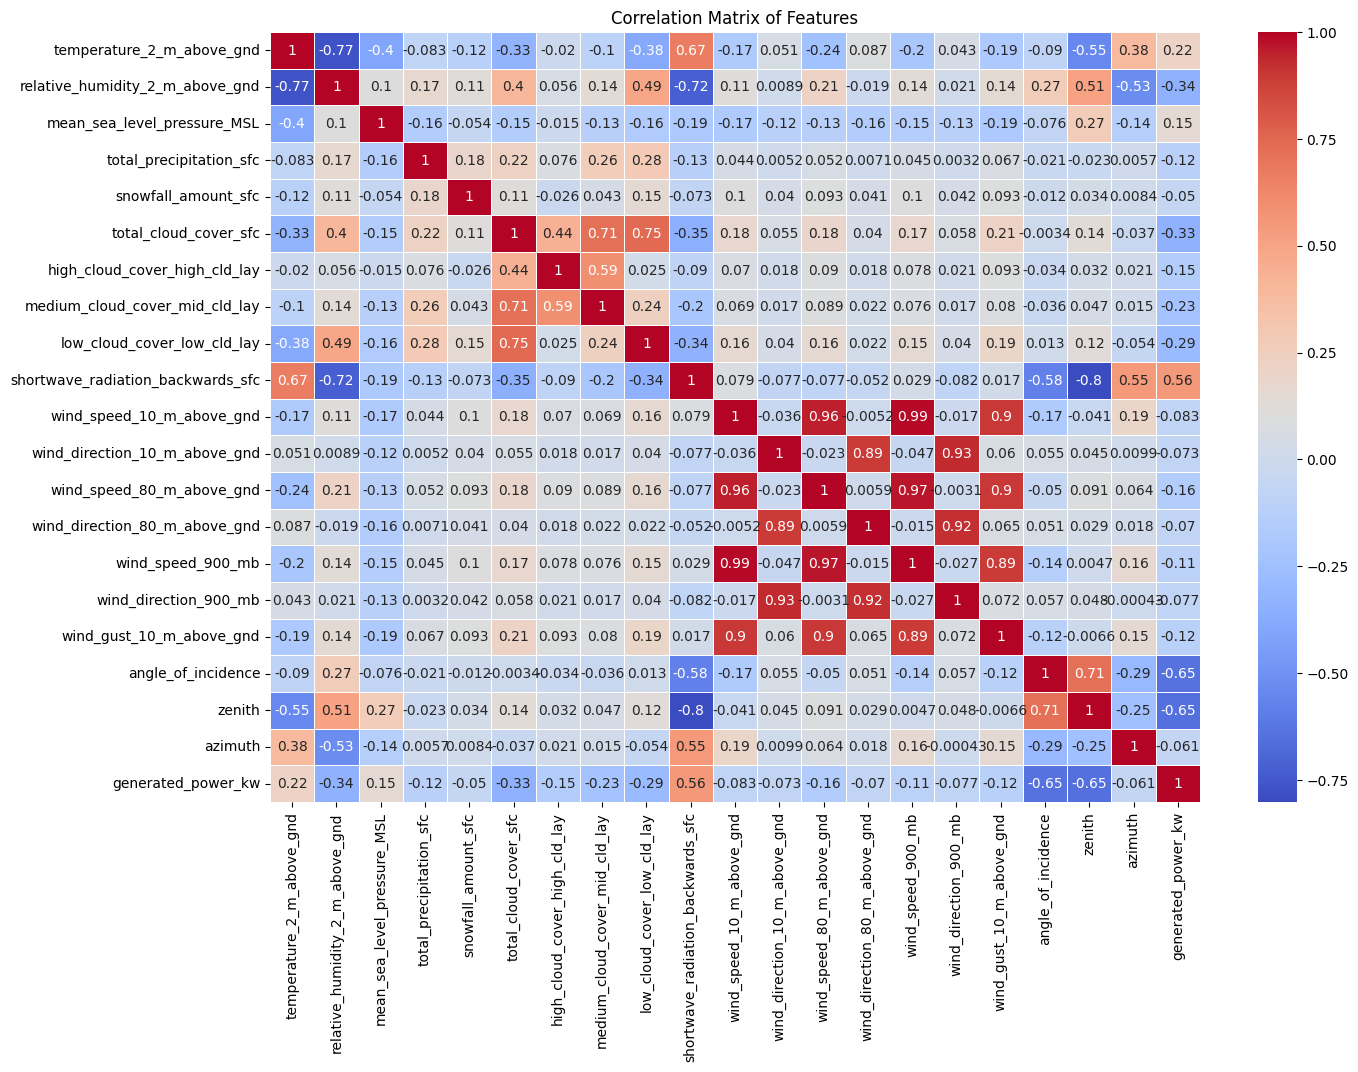

In [141]:
#Data Preprocessing and Feature Engineering
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop('generated_power_kw', axis=1))

### EDA

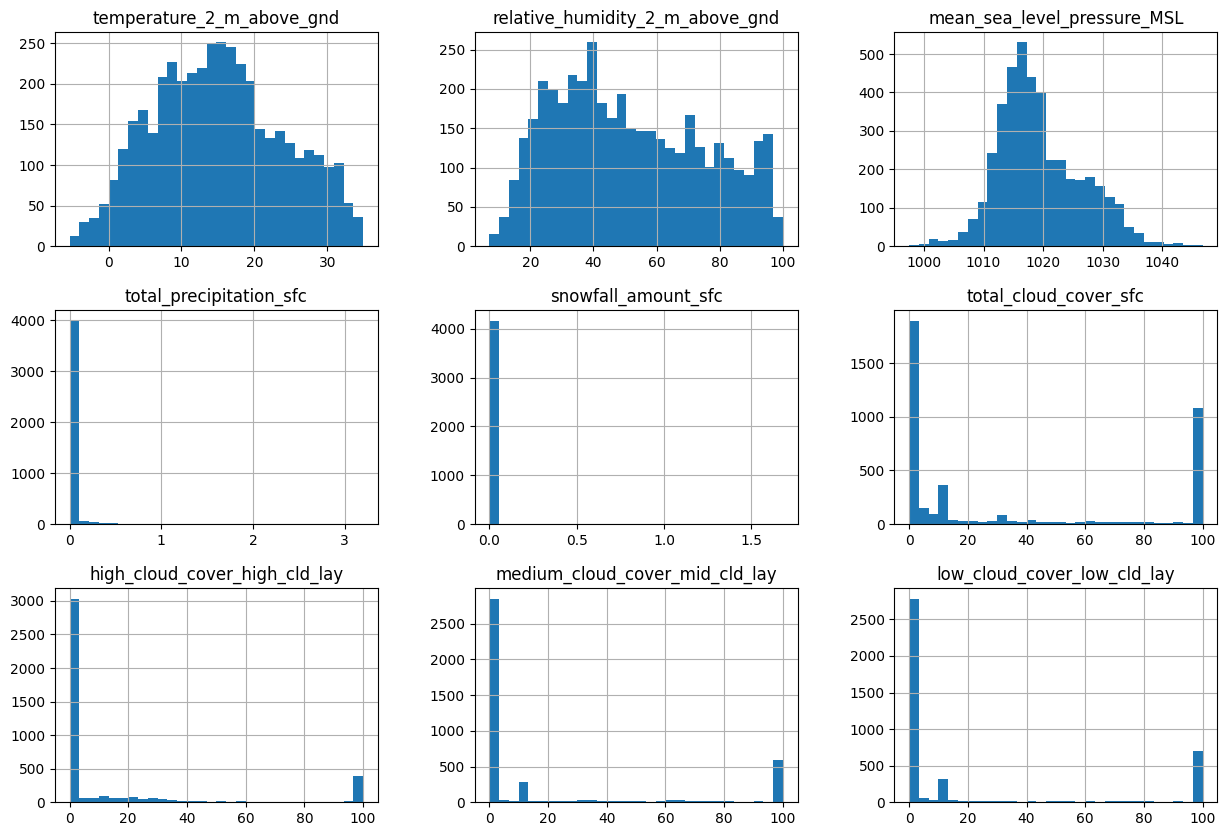

In [142]:
#Histogram For Remaining Columns
data[data.columns[:9]].hist(bins=30, figsize=(15, 10))
plt.show()


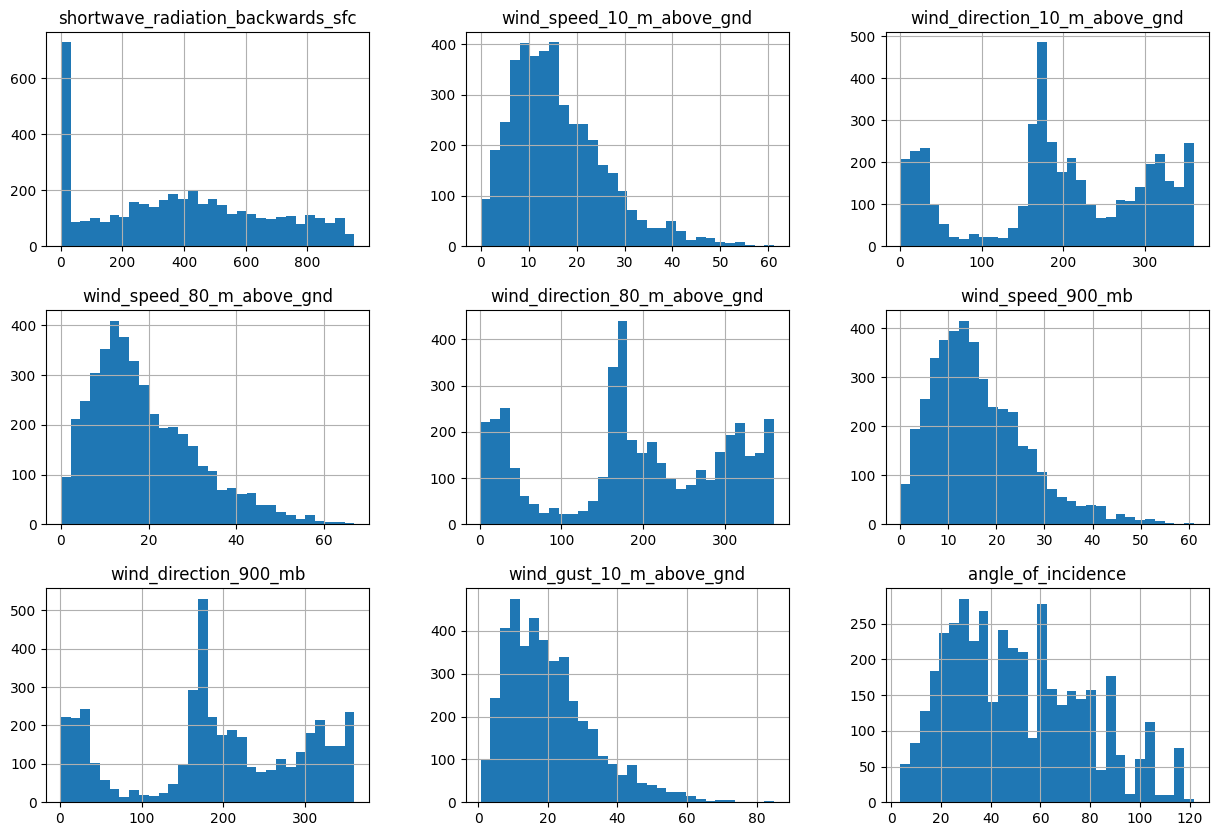

In [143]:
data[data.columns[9:18]].hist(bins=30, figsize=(15, 10))
plt.show()

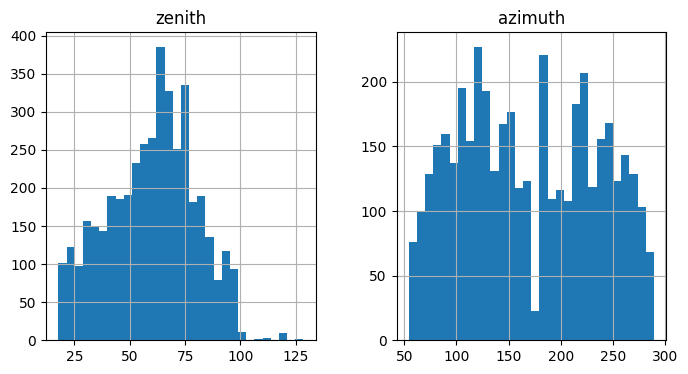

In [144]:
data[data.columns[18:20]].hist(bins=30, figsize=(8, 4))
plt.show()

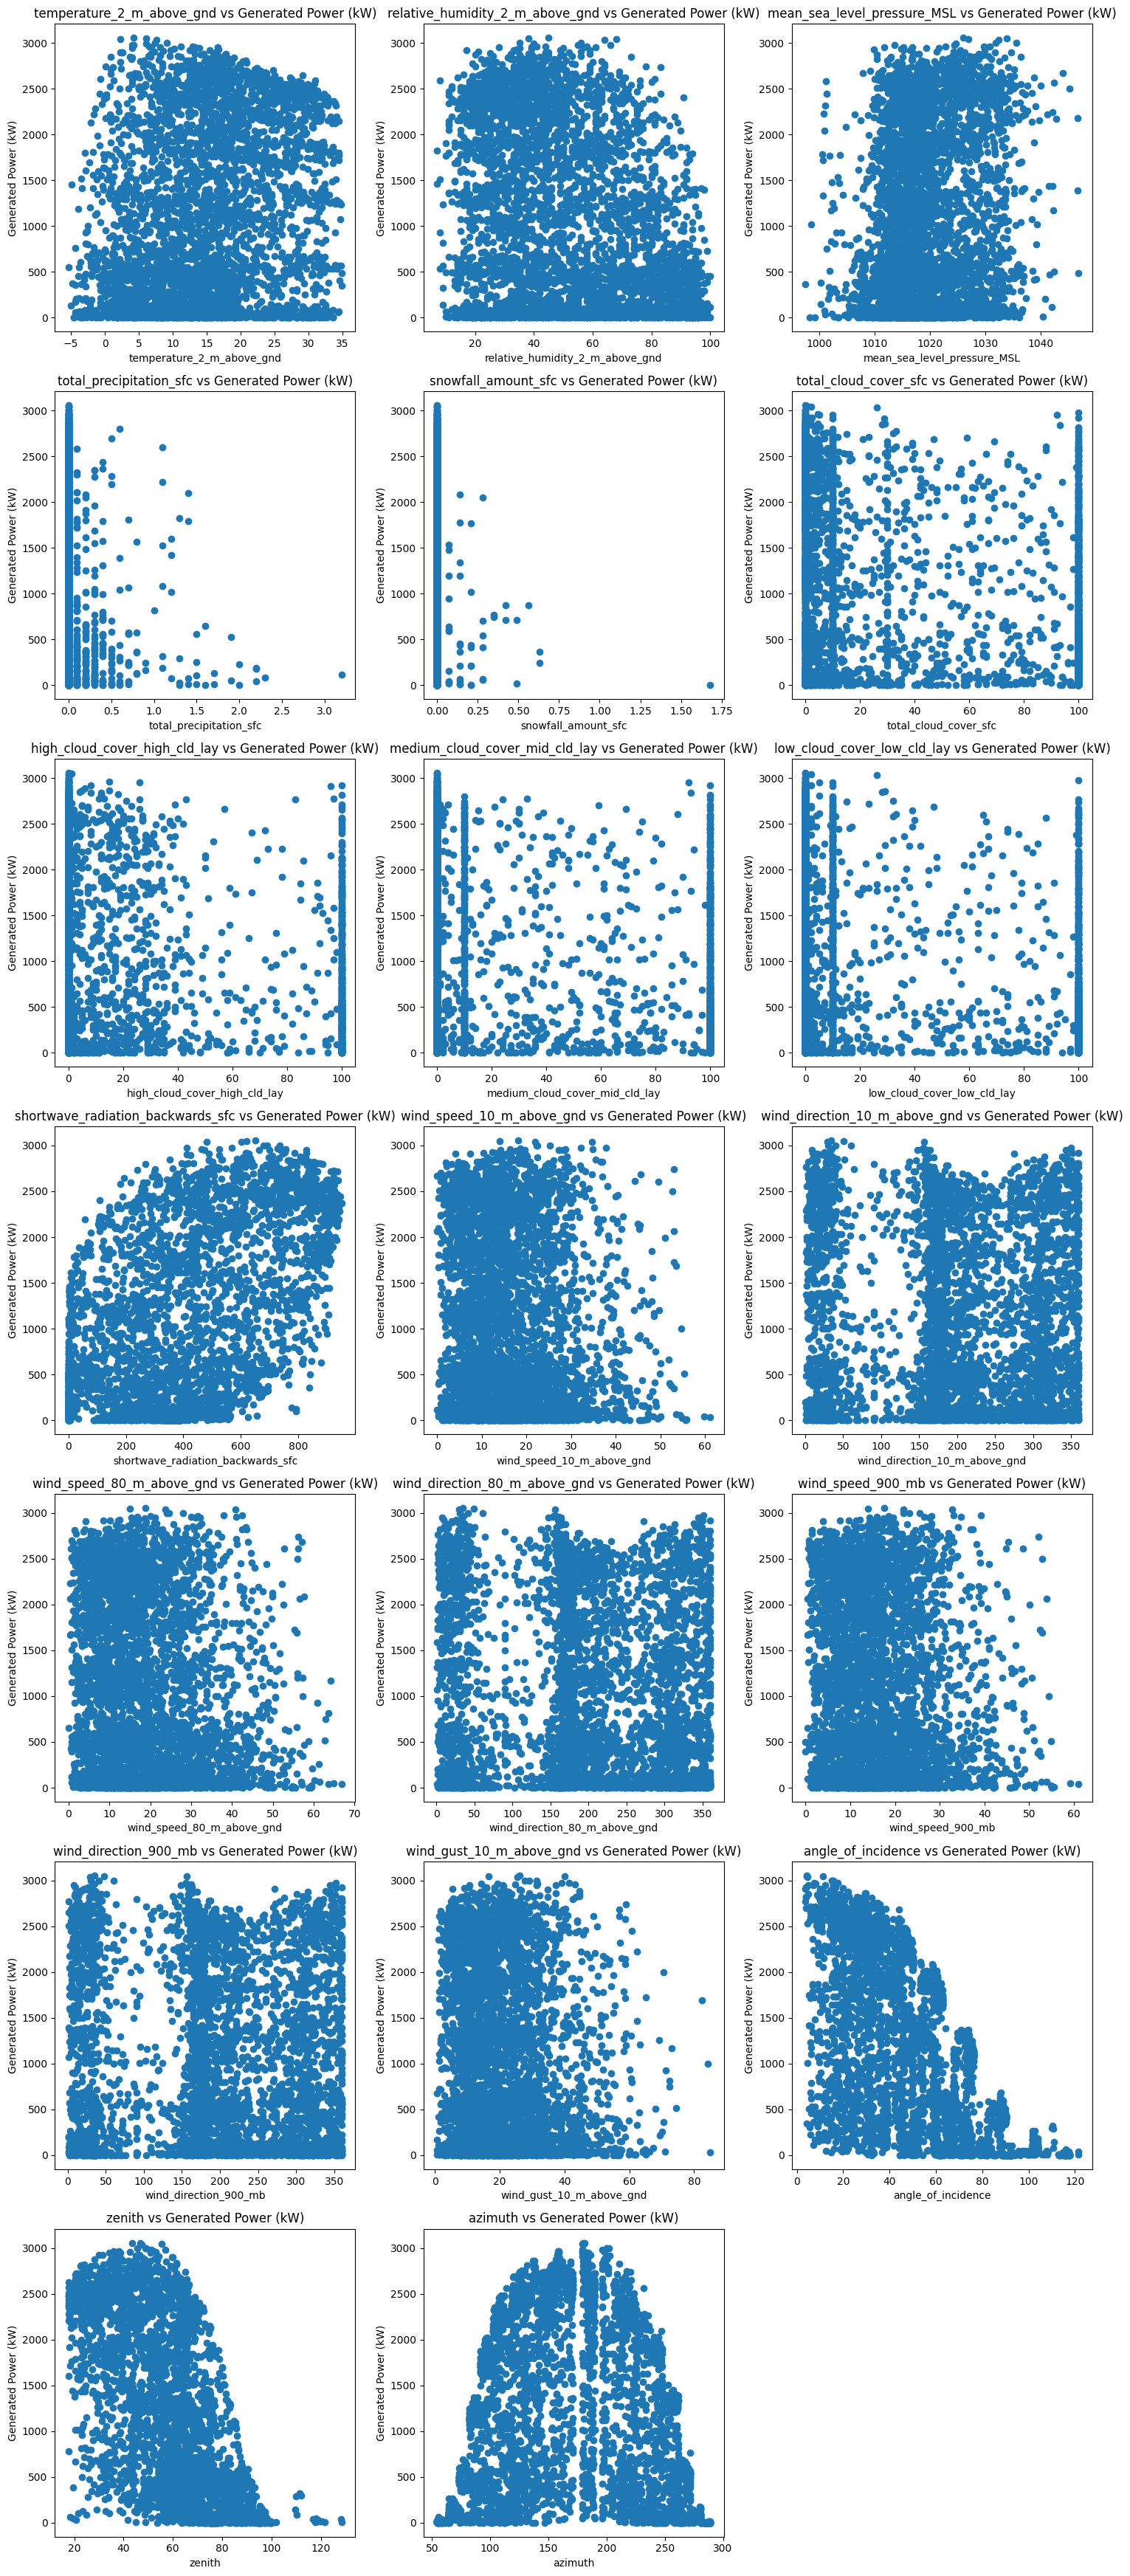

In [145]:
# Bivariate analysis
# Scatter plot with target feature

num_columns = len(data.columns)

# Calculate the number of rows needed for the subplots
num_rows = (num_columns + 2) // 3  # Ceiling division to accommodate all plots

plt.figure(figsize=(15, 5 * num_rows))  # Adjust height dynamically

for i, column in enumerate(data.columns):
    if column != 'generated_power_kw':  # Exclude 'generated_power_kw' from x-axis
        plt.subplot(num_rows, 3, i + 1)
        plt.scatter(data[column], data['generated_power_kw'])
        plt.title(f'{column} vs Generated Power (kW)')
        plt.xlabel(column)
        plt.ylabel('Generated Power (kW)')

plt.tight_layout()
plt.show()

In [146]:
data.corr()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
temperature_2_m_above_gnd,1.000000,-0.771704,-0.402240,-0.083137,-0.121422,-0.326641,-0.019522,-0.100980,-0.381876,0.665755,...,0.051393,-0.244869,0.086630,-0.198107,0.043233,-0.188264,-0.090173,-0.545646,0.381797,0.217280
relative_humidity_2_m_above_gnd,-0.771704,1.000000,0.100529,0.168660,0.113987,0.402895,0.056452,0.135347,0.490402,-0.721754,...,0.008902,0.212868,-0.019408,0.135464,0.021068,0.144807,0.268460,0.513748,-0.525760,-0.336783
mean_sea_level_pressure_MSL,-0.402240,0.100529,1.000000,-0.159098,-0.053871,-0.151995,-0.014646,-0.129812,-0.162043,-0.188387,...,-0.119867,-0.131442,-0.161020,-0.145696,-0.125234,-0.189266,-0.075619,0.268111,-0.137872,0.150551
total_precipitation_sfc,-0.083137,0.168660,-0.159098,1.000000,0.184497,0.223678,0.076255,0.262367,0.282748,-0.130358,...,0.005234,0.052376,0.007131,0.044797,0.003216,0.066701,-0.020965,-0.023408,0.005749,-0.118442
snowfall_amount_sfc,-0.121422,0.113987,-0.053871,0.184497,1.000000,0.112646,-0.026356,0.042867,0.151609,-0.073499,...,0.039734,0.093156,0.041246,0.100405,0.041716,0.093060,-0.012497,0.033554,0.008426,-0.049508
total_cloud_cover_sfc,-0.326641,0.402895,-0.151995,0.223678,0.112646,1.000000,0.442865,0.712077,0.746225,-0.345089,...,0.055057,0.183732,0.039671,0.174510,0.057816,0.212142,-0.003426,0.136249,-0.037427,-0.334338
high_cloud_cover_high_cld_lay,-0.019522,0.056452,-0.014646,0.076255,-0.026356,0.442865,1.000000,0.593300,0.024703,-0.089620,...,0.017688,0.090049,0.018228,0.078204,0.020897,0.092842,-0.033840,0.031766,0.020790,-0.147723
medium_cloud_cover_mid_cld_lay,-0.100980,0.135347,-0.129812,0.262367,0.042867,0.712077,0.593300,1.000000,0.236716,-0.199843,...,0.016954,0.088972,0.021935,0.076192,0.017195,0.079627,-0.035511,0.046719,0.014802,-0.227834
low_cloud_cover_low_cld_lay,-0.381876,0.490402,-0.162043,0.282748,0.151609,0.746225,0.024703,0.236716,1.000000,-0.336751,...,0.040060,0.156204,0.021782,0.153578,0.039875,0.193846,0.013421,0.120854,-0.054328,-0.288066
shortwave_radiation_backwards_sfc,0.665755,-0.721754,-0.188387,-0.130358,-0.073499,-0.345089,-0.089620,-0.199843,-0.336751,1.000000,...,-0.076530,-0.077090,-0.051670,0.028929,-0.081545,0.017212,-0.576921,-0.801892,0.549296,0.556148


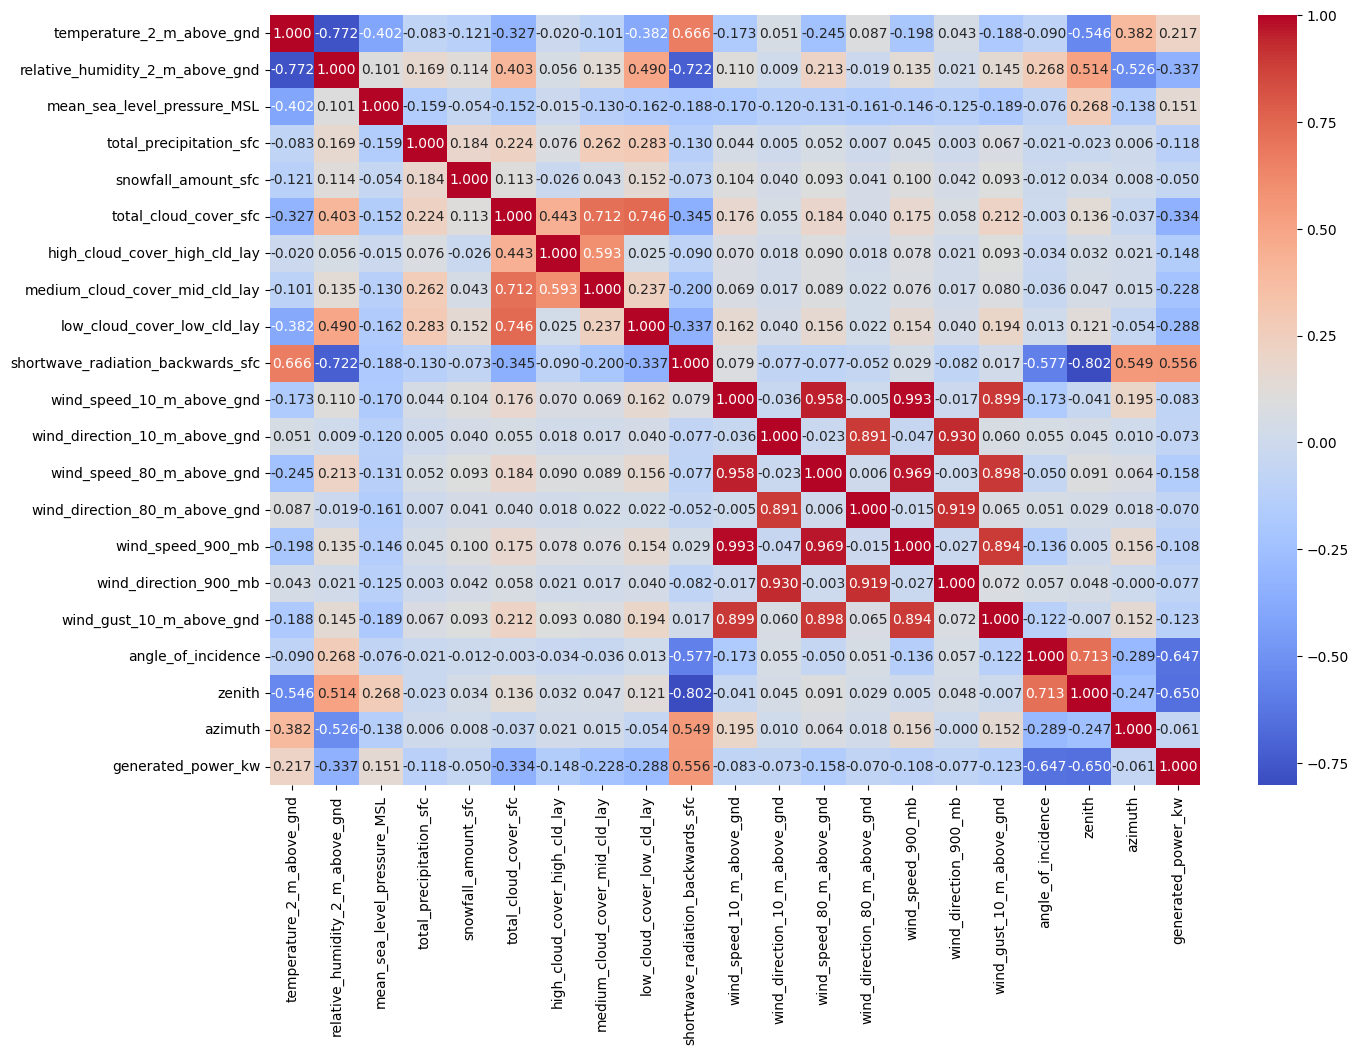

In [147]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), cmap='coolwarm', annot=True, fmt='.3f')
plt.show()

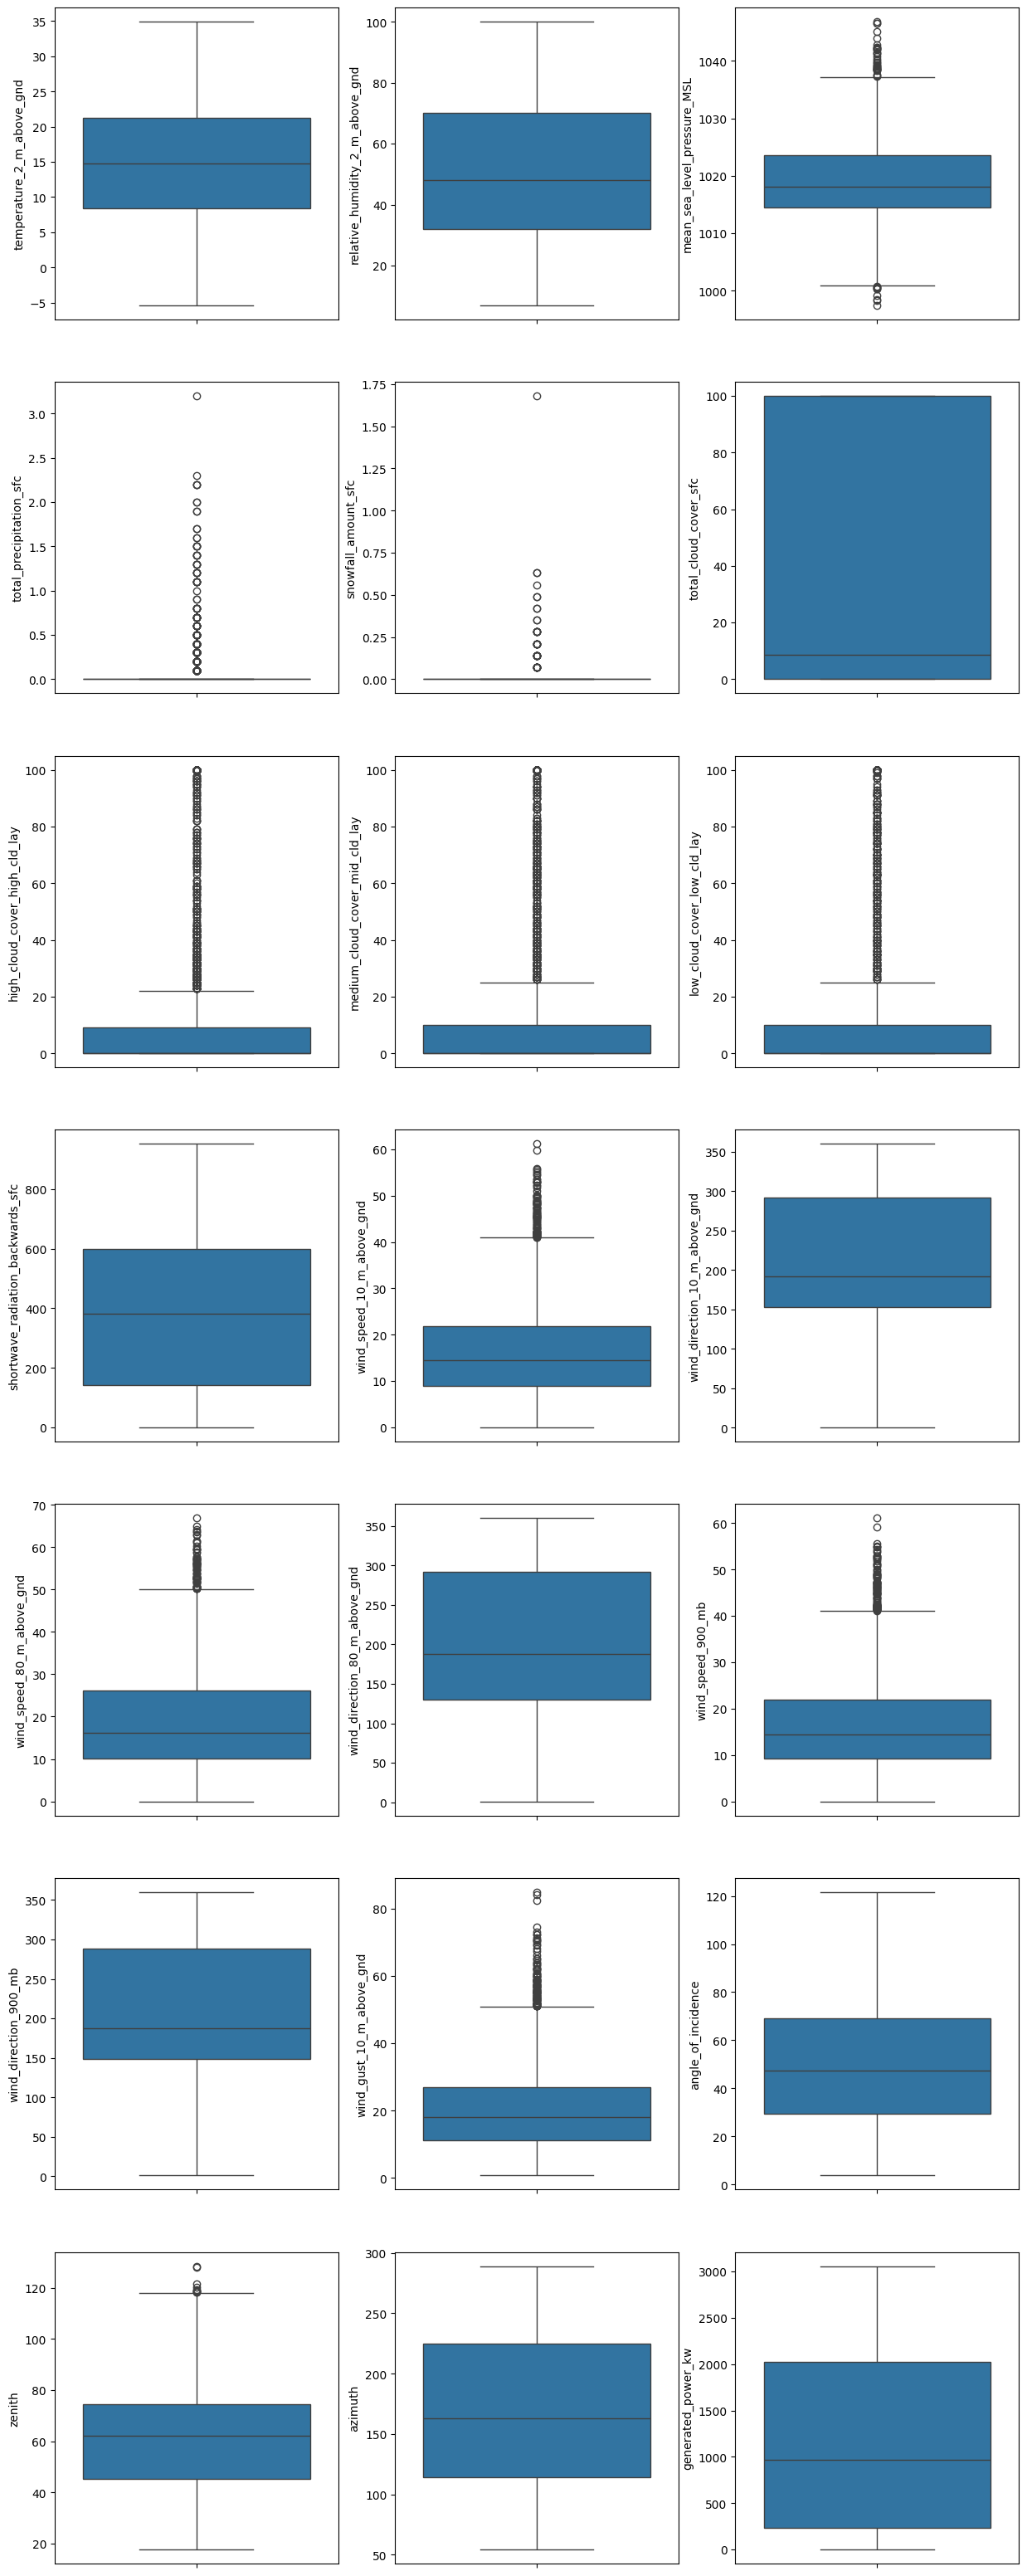

In [148]:
# Outlier
plt.figure(figsize=(15, 40))

for i, column in enumerate(data.columns):
    plt.subplot(7, 3, i+1)
    sns.boxplot(data[column])

plt.show()

### Additional EDA (Exploratory Data Analysis)

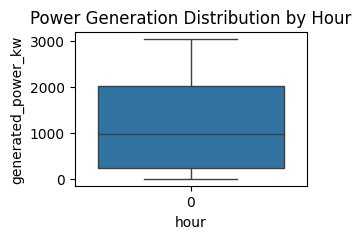

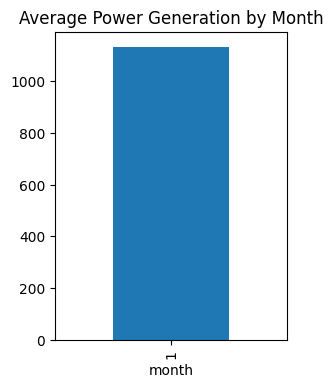

In [149]:
# Time-Based Analysis
# Convert to datetime if needed
data['hour'] = pd.to_datetime(data.index).hour
data['month'] = pd.to_datetime(data.index).month

# Hourly power generation patterns
plt.figure(figsize=(3,2))
sns.boxplot(x='hour', y='generated_power_kw', data=data)
plt.title('Power Generation Distribution by Hour')
plt.show()

# Monthly patterns
monthly_avg = data.groupby('month')['generated_power_kw'].mean()
plt.figure(figsize=(3, 4))
monthly_avg.plot(kind='bar')
plt.title('Average Power Generation by Month')
plt.show()

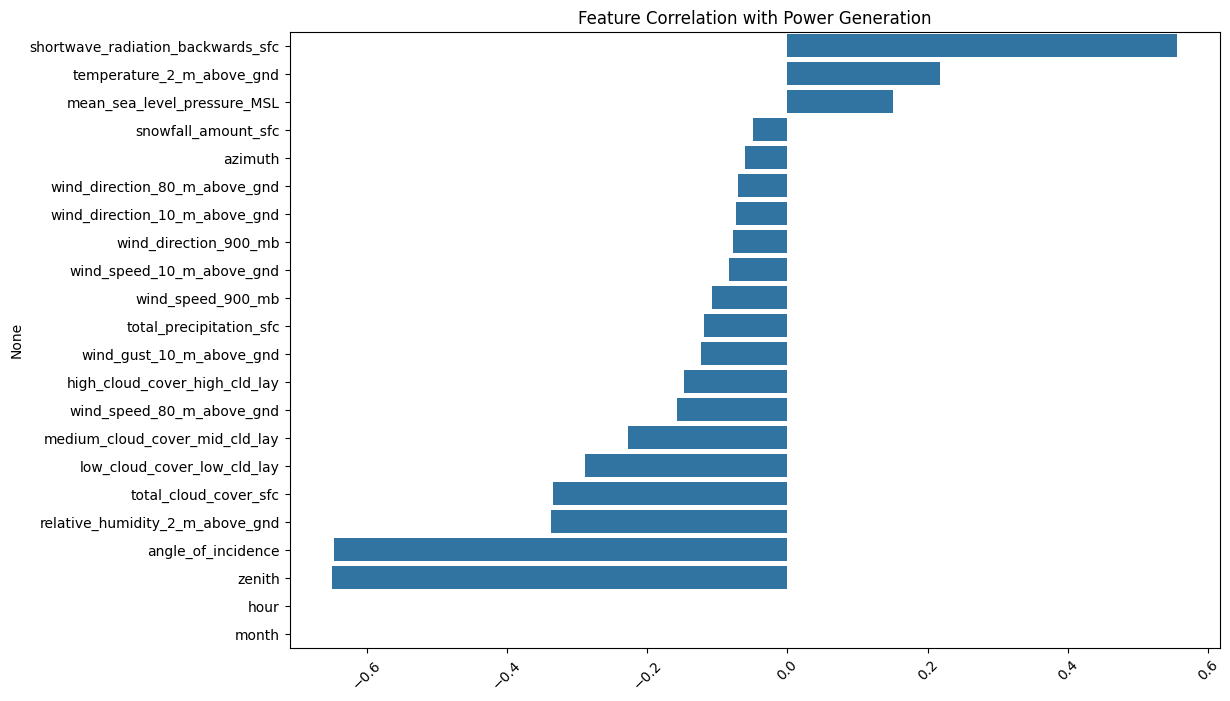

In [150]:
# Advanced Correlation Analysis
# Correlation with target variable
correlations = data.corr()['generated_power_kw'].sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=correlations.values[1:], y=correlations.index[1:])
plt.title('Feature Correlation with Power Generation')
plt.xticks(rotation=45)
plt.show()

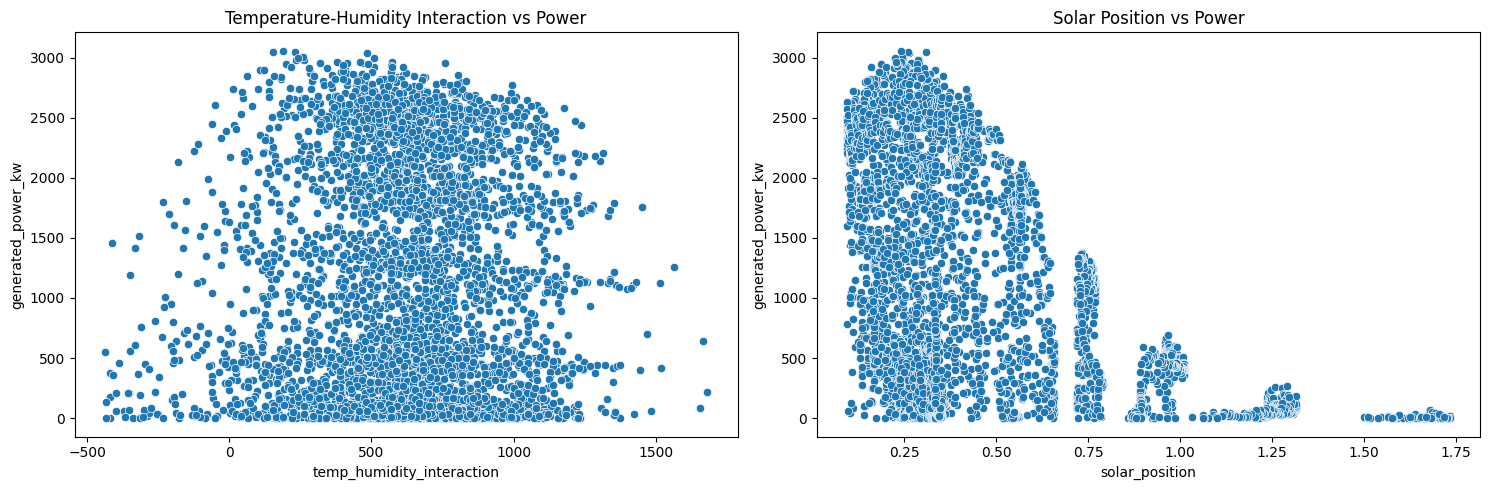

In [151]:
# Feature Interaction Analysis
# Create and analyze derived features
data['temp_humidity_interaction'] = data['temperature_2_m_above_gnd'] * data['relative_humidity_2_m_above_gnd']
data['solar_position'] = data['zenith'] / data['azimuth']

# Visualize new features
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=data, x='temp_humidity_interaction', y='generated_power_kw')
plt.title('Temperature-Humidity Interaction vs Power')

plt.subplot(1, 2, 2)
sns.scatterplot(data=data, x='solar_position', y='generated_power_kw')
plt.title('Solar Position vs Power')
plt.tight_layout()
plt.show()

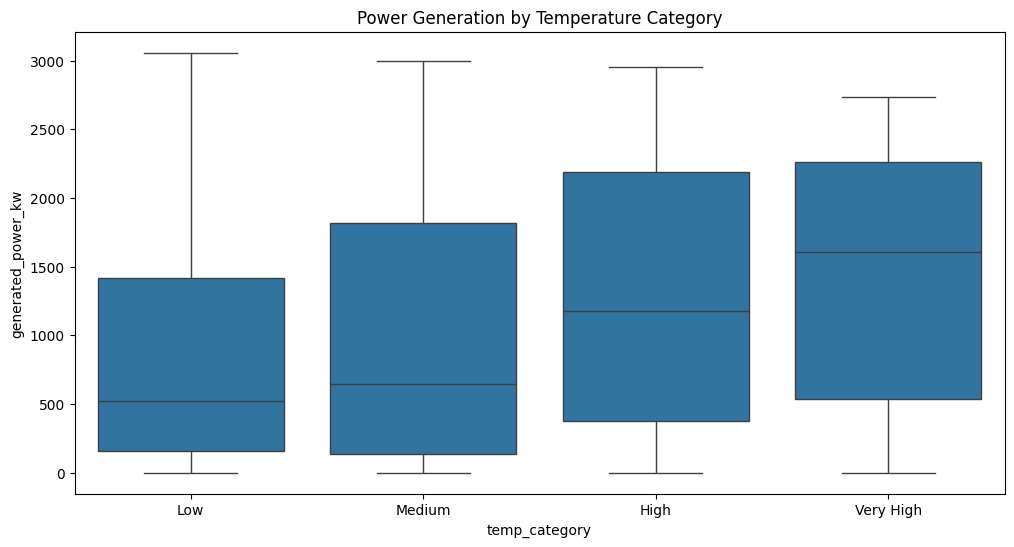

                count         mean         std       min         25%  \
temp_category                                                          
Low            1055.0   870.847636  859.145999  0.003922  156.913050   
Medium         1054.0   997.749684  927.184929  0.006578  139.283682   
High           1052.0  1267.469574  959.232127  0.003409  372.928135   
Very High      1052.0  1402.333472  908.871326  0.000595  535.767017   

                       50%         75%        max  
temp_category                                      
Low             522.290000  1417.06310  3056.7941  
Medium          644.110375  1817.09145  2999.3172  
High           1177.465550  2189.58325  2951.6153  
Very High      1606.392850  2260.27475  2731.1986  


In [152]:
# Segmentation Analysis
# Analyze power generation in different conditions
data['temp_category'] = pd.qcut(data['temperature_2_m_above_gnd'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

plt.figure(figsize=(12, 6))
sns.boxplot(x='temp_category', y='generated_power_kw', data=data)
plt.title('Power Generation by Temperature Category')
plt.show()

# Summary statistics by category
print(data.groupby('temp_category')['generated_power_kw'].describe())